# DBSCAN clustering from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generating clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


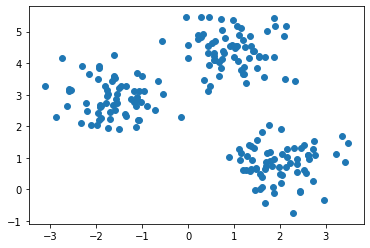

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],s=35)

# DBSCAN parameters and data

In [3]:
eps=1
min_pts=10
data=X

# labeling points

In [4]:
def lets_label(data,p_idx,labels,eps,minp,cluster):
    neighbours=[]
    lab_idx=[]
    for i in range(data.shape[0]):
        if np.linalg.norm(data[p_idx]-data[i])<=eps:
            neighbours.append(data[i])
            lab_idx.append(i)
    if(len(neighbours)<minp):
        for j in range(len(labels)):
            if j in lab_idx:
                labels[j]=-1
    else:
        for k in range(len(labels)):
            if k in lab_idx:
                labels[k]=cluster
    
    return labels

# implementation

In [5]:
labels=[0]*data.shape[0]
clus=1
for r in range(data.shape[0]):
    if labels[r]==0:
        labels=lets_label(data,r,labels,eps,min_pts,clus)
        clus=clus+1


# plotting results

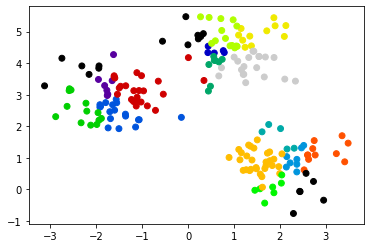

In [6]:
plt.scatter(data[:,0],data[:,1],c=labels,s=35,cmap='nipy_spectral')

# black points are outliers

In [8]:
#rough
labels